# Q-8. 

### Business Understanding:

In this problem statement we have to build a model  that can able to predict which of the provided pairs of questions contain two questions with the same meaning. The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

In [1]:
# Importing libraries

# Default
import pandas as pd
import numpy as np

# Graph plotting library
import matplotlib.pyplot as plt
import seaborn as sns

# Sk-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Web libraries
from flask import Flask, request, jsonify

In [2]:
# Getting dataset

df_train = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\Placement_Task\\train.csv')
df_train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df_test = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\Placement_Task\\test.csv')
df_test

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [4]:
df_sample = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\Placement_Task\\sample_submission.csv')
df_sample

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2345791,2345791,1
2345792,2345792,1
2345793,2345793,1
2345794,2345794,1


#### We will use the train data to train the model

In [5]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Let's Understand the data

**Data Set Information:**

Data fields

- id - the id of a training set question pair
- qid1, qid2 - unique ids of each question (only available in train.csv)
- question1, question2 - the full text of each question
- is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

## Basic analysis and data preprocessing

**"is_duplicated"**

In [6]:
df_train['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

Text(0.5, 1.0, 'Feature name : is_duplicate')

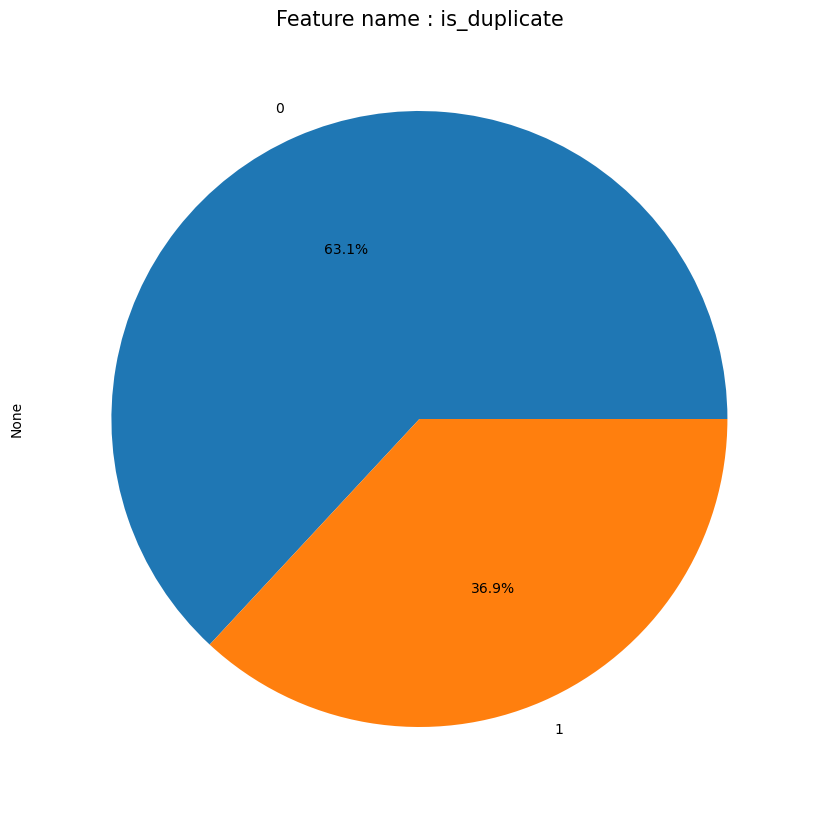

In [7]:
plt.figure(figsize=(20,10))
df_train.value_counts('is_duplicate').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : is_duplicate", fontsize = 15)

#### Observation:
- There are 149263 questions with same meaning

**"question1"**

In [8]:
df_train['question1'].value_counts()

How do I improve my English speaking?                                                                                50
How does the ban on 500 and 1000 rupee notes helps to identify black money and corruption?                           48
How do I improve my English language?                                                                                47
What should I do to earn money online?                                                                               47
How can changing 500 and 1000 rupee notes end the black money in India?                                              47
                                                                                                                     ..
How well does Google Maps turn-by-turn navigation work with 2G/Edge speeds?                                           1
Why did saina nehwal changed her coach from gopichand to vimal kumar?                                                 1
What tricks can be used during public sp

#### Observation:
- "How do I improve my English speaking?" is a most repeated questions.

**"question2"**

In [9]:
df_train['question2'].value_counts()

How can you look at someone's private Instagram account without following them?                                                                        120
What are the best ways to lose weight?                                                                                                                 119
How can I lose weight quickly?                                                                                                                         100
What's the easiest way to make money online?                                                                                                            71
What are some things new employees should know going into their first day at AT&T?                                                                      66
                                                                                                                                                      ... 
Are you afraid that Donald Trump will start a nuclear war?            

#### Observation:
- "How can you look at someone's private Instagram account without following them?" is a most repeated questions.

### Preprocess the data

In [10]:
# Fill missing values with empty strings
df_train.fillna('', inplace=True)
df_test.fillna('', inplace=True)

# Example preprocessing step: converting text to lowercase
df_train['question1'] = df_train['question1'].str.lower()
df_test['question2'] = df_test['question2'].str.lower()

## Model Building and Evaluation

In [11]:
# Step 3: Create TF-IDF vectors
corpus = df_train['question1'] + ' ' + df_train['question2']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_train['is_duplicate'], test_size=0.2, random_state=42)

# Step 5: Choose a supervised algorithm
model = LogisticRegression()

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7548912909050434


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
